In [84]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from z3 import *

https://www.linkedin.com/posts/saragossa_puzzlethursday-activity-6877202169641234433-RWb4    

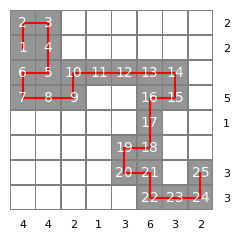

Took 0.6830 seconds


In [87]:
def neighbours(i,j,N):
    return [[i+x,j+y] for (x,y) in [(-1,0),(0,-1),(1,0),(0,1)] if i+x >= 0 and i+x < N and j+y >= 0 and j+y < N ]

start= time.time()

# set up the variables
X = np.array(IntVector('x', N*N),dtype=object).reshape((N,N))
Y = Int("y")

# puzzle definition
rowtots = [4,4,2,1,3,6,3,2]
col_tots = [2,2,Y,5,1,9-Y,3,3]  
total = sum(row_tots)
N= 8
        
# puzzle is finite domain   
s = Tactic('pqffd').solver()

# rules of the game
s += And(Y>0,Y<9)
s += [And(e >= 0  ,e <= total) for (i,j),e in np.ndenumerate(X)]
s += X[1,0] == 1
s += X[6,7] == total
s += And([Sum([If(X[n,i] !=0,1,0) for i in range(N)]) == col_tots[n] for n in range(N)]) # column totals
s += And([Sum([If(X[i,n] !=0,1,0) for i in range(N)]) == row_tots[n] for n in range(N)]) # row totals
s += [PbEq([(e==n,1) for (i,j),e in np.ndenumerate(X)],1) for n in range(1,total+1)]     # steps are unique
for (i,j),e in np.ndenumerate(X):
    s += Implies(X[i,j] >1,Or([X[k,l] == e-1 for k,l in neighbours(i,j,N)]))             # steps in sequence
 

if s.check() == sat:
    m = s.model()
    evalu = np.vectorize(lambda x:m.evaluate(x).as_long())
    result =  evalu(X)
    fig,ax = plt.subplots(1,1,figsize=(2.5,2.5)) 
    y = np.array(result).astype('int').astype('str')
    y[y=="0"] =""
    xpoints = [[j+0.5 for (i,j),e in np.ndenumerate(result) if e==n][0] for n in range(1,total+1)]
    ypoints = [[i+0.5 for (i,j),e in np.ndenumerate(result) if e==n][0] for n in range(1,total+1)]
    sns.heatmap(result !=0,annot=y,cbar=False,cmap="Greys",fmt="",linewidths=0.5,center= 1,linecolor="grey",annot_kws={"size":10},
         xticklabels=row_tots  , yticklabels=[2,2,"",5,1,"",3,3])
    ax.tick_params(left=False, bottom=False,labelleft=False, labelright=True)
    plt.xticks(rotation=0,fontsize =8)
    plt.yticks(rotation=0,fontsize =8)         
    plt.plot(xpoints,ypoints,"r")
    plt.tight_layout()       
    plt.show()
    print("Took {:.4f} seconds".format(time.time()-start))    
else:
    print("{} Failed in {:.4f} seconds".format(x,time.time()-start))       